In [1]:
import pandas as pd
import numpy as np
from statsmodels.stats.weightstats import _zconfint_generic, _tconfint_generic
from statsmodels.stats.proportion import proportion_confint
from statsmodels.stats.proportion import samplesize_confint_proportion
import scipy.stats as sps
import matplotlib.pyplot as plt

# Доверительные интервалы

In [5]:
data = pd.read_csv('water.txt', delimiter='\t')
data.head()

,location,town,mortality,hardness
0,South,Bath,1247,105
1,North,Birkenhead,1668,17
2,South,Birmingham,1466,5
3,North,Blackburn,1800,14
4,North,Blackpool,1609,18


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61 entries, 0 to 60
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   location   61 non-null     object
 1   town       61 non-null     object
 2   mortality  61 non-null     int64 
 3   hardness   61 non-null     int64 
dtypes: int64(2), object(2)
memory usage: 2.0+ KB


Будьте осторожны при использовании метода std()! Дело в том, что у объекта numpy он по умолчанию вычисляется как усредненный на n, а у объекта pandas — как усредненный на n-1. 
Нас интересует только второй вариант, несмещённая оценка стандартного отклонения.

**Чтобы не думать всё время о том, правильно ли вычисляется в вашем случае std(), можно всегда использовать std(ddof=1) (ddof — difference in degrees of freedom), тогда нормировка всегда будет на n-1.**

Для 61 большого города в Англии и Уэльсе известны средняя годовая смертность на 100000 населения (по данным 1958–1964) и концентрация кальция в питьевой воде (в частях на миллион). Чем выше концентрация кальция, тем жёстче вода. Города дополнительно поделены на северные и южные

## Постройте 95% доверительный интервал для средней годовой смертности в больших городах. А также в разрезе Севера и Юга

In [13]:
# Мы не знаем дисперсию генеральной совокупности, поэтому построим t-интервал для среднего значения смертности
num = data.shape[0]
mort_mean = data['mortality'].mean()
mort_std = data['mortality'].std(ddof=1)
mort_mean_std = mort_std / np.sqrt(num)
conf_int = _tconfint_generic(mort_mean, mort_mean_std, num - 1, 0.05, 'two-sided')
print(f"Точечная оценка средней смертности: {mort_mean}")
print(f"Несмещенная оценка стандартного отклонения: {mort_std}")
print(f"Оценка стандартного отклонения выборочных средних: {mort_mean_std }")
print(f'95%-ный доверительный интервал для средней смертности:{conf_int}')

Точечная оценка средней смертности: 1524.1475409836066
Несмещенная оценка стандартного отклонения: 187.6687539314571
Оценка стандартного отклонения выборочных средних: 24.028521714278174
95%-ный доверительный интервал для средней смертности:(1476.0833413552848, 1572.2117406119285)


In [14]:
south = data[data['location']=='South']

In [15]:
num = south.shape[0]
mort_mean = south['mortality'].mean()
mort_std = south['mortality'].std(ddof=1)
mort_mean_std = mort_std / np.sqrt(num)
conf_int = _tconfint_generic(mort_mean, mort_mean_std, num - 1, 0.05, 'two-sided')
print(f"Точечная оценка средней смертности: {mort_mean}")
print(f"Несмещенная оценка стандартного отклонения: {mort_std}")
print(f"Оценка стандартного отклонения выборочных средних: {mort_mean_std }")
print(f'95%-ный доверительный интервал для средней смертности:{conf_int}')

Точечная оценка средней смертности: 1376.8076923076924
Несмещенная оценка стандартного отклонения: 140.26917529686108
Оценка стандартного отклонения выборочных средних: 27.509048538240833
95%-ный доверительный интервал для средней смертности:(1320.1517462936238, 1433.463638321761)


In [16]:
north = data[data['location']=='North']

In [17]:
num = north.shape[0]
mort_mean = north['mortality'].mean()
mort_std = north['mortality'].std(ddof=1)
mort_mean_std = mort_std / np.sqrt(num)
conf_int = _tconfint_generic(mort_mean, mort_mean_std, num - 1, 0.05, 'two-sided')
print(f"Точечная оценка средней смертности: {mort_mean}")
print(f"Несмещенная оценка стандартного отклонения: {mort_std}")
print(f"Оценка стандартного отклонения выборочных средних: {mort_mean_std }")
print(f'95%-ный доверительный интервал для средней смертности:{conf_int}')

Точечная оценка средней смертности: 1633.6
Несмещенная оценка стандартного отклонения: 136.93691119292424
Оценка стандартного отклонения выборочных средних: 23.146562624816188
95%-ный доверительный интервал для средней смертности:(1586.5605251961385, 1680.6394748038613)


## Вспомним формулу доверительного интервала для среднего нормально распределённой случайной величины с дисперсией σ^2

При σ=1 какой нужен объём выборки, чтобы на уровне доверия 95% оценить среднее с точностью +- 0.1

In [25]:
# z-значение
z = sps.norm(loc=0, scale=1).ppf(0.975)
print(f"Квантиль порядка 0.975 стандартного нормального распределения: {z}")
print(f"какой нужен объем выборки: {(z*10)**2}")

Квантиль порядка 0.975 стандартного нормального распределения: 1.959963984540054
какой нужен объем выборки: 384.14588206941244


 Давайте уточним правило трёх сигм. Утверждение: 99.7% вероятностной массы случайной величины X\sim N\left(\mu,\sigma^2\right)X∼N(μ,σ 
2
 ) лежит в интервале \mu\pm c \cdot \sigmaμ±c⋅σ. Чему равно точное значение константы cc? Округлите ответ до четырёх знаков после десятичной точки.  

In [40]:
sps.norm(loc=0, scale=1).ppf(0.9985)

2.9677379253417944

## Доверительный интервал для доли
Из 50 исследованных представителей народа майя вариант 13910T был обнаружен у одного. Постройте нормальный 95% доверительный интервал для доли носителей варианта 13910T в популяции майя. Чему равна его нижняя граница? Округлите ответ до 4 знаков после десятичной точки.

In [28]:
# Так как доля успехов близка к 0, нормальный метод использовать некорректно
proportion_confint(1, 50, method = 'normal')

(0.0, 0.05880530708179099)

In [29]:
proportion_confint(1, 50, method = 'wilson')

(0.003539259271646236, 0.10495443589637815)

Пусть в популяции майя действительно 2% носителей варианта 13910T, как в выборке, которую мы исследовали. Какой объём выборки нужен, чтобы с помощью нормального интервала оценить долю носителей гена 13910T с точностью \pm0.01±0.01 на уровне доверия 95%?

In [31]:
samplesize_confint_proportion(0.02, 0.01)

752.9259288560489

Постройте график зависимости объёма выборки, необходимого для оценки для доли носителей гена 13910T с точностью \pm0.01±0.01 на уровне доверия 95%, от неизвестного параметра pp. Посмотрите, при каком значении pp нужно больше всего испытуемых. Как вы думаете, насколько вероятно, что выборка, которую мы анализируем, взята из случайной величины с этим значением параметра?

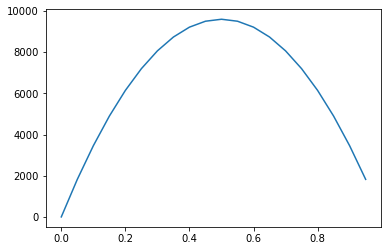

In [35]:
p = np.arange(0, 1, 0.05)
sample_sizes = [np.ceil(samplesize_confint_proportion(p_, 0.01)) for p_ in p]
plt.plot(p, sample_sizes)

In [37]:
np.array(sample_sizes).max()

9604.0

## Доверительный интервал для разницы долей

В пятилетнем рандомизированном исследовании Гарвардской медицинской школы 11037 испытуемых через день принимали аспирин, а ещё 11034 — плацебо. Исследование было слепым, то есть, испытуемые не знали, что именно они принимают.

За 5 лет инфаркт случился у 104 испытуемых, принимавших аспирин, и у 189 принимавших плацебо. 

Оцените, насколько вероятность инфаркта снижается при приёме аспирина. Округлите ответ до четырёх знаков после десятичной точки.

In [43]:
# Точечная оценка снижения вероятноси инфаркта
189/11034 - 104 / 11037

0.0077060239760047815

In [42]:
# Выборки являются независимыми

def proportions_confint_diff_independant(suc1, len1, suc2, len2, alpha = 0.05):    
    z = sps.norm.ppf(1 - alpha / 2.)   
    p1 = suc1 / len1
    p2 = suc2 / len2
    
    left_boundary = (p1 - p2) - z * np.sqrt(p1 * (1 - p1)/ len1 + p2 * (1 - p2)/ len2)
    right_boundary = (p1 - p2) + z * np.sqrt(p1 * (1 - p1)/ len1 + p2 * (1 - p2)/ len2)
    
    return (left_boundary, right_boundary)

proportions_confint_diff_independant(104, 11037, 189, 11034)
                                        

(-0.010724297276960124, -0.004687750675049439)

Для бернуллиевских случайных величин X\sim Ber(p)X∼Ber(p) часто вычисляют величину p / (1 - p), которая называется шансами (odds). Оцените, во сколько раз понижаются шансы инфаркта при регулярном приёме аспирина. Округлите ответ до четырёх знаков после десятичной точки

In [46]:
# Шансы инфаркта без аспирина:
p_inf_placebo = 189 / 11034
p_inf_aspirin = 104 / 11037
inf_chance_placebo = p_inf_placebo / (1-p_inf_placebo)
inf_chance_aspirin = p_inf_aspirin / (1-p_inf_aspirin)
print(f'Шансы инфаркта без аспирина: {inf_chance_placebo}')
print(f'Шансы инфаркта с аспирином: {inf_chance_aspirin}')
print(f'Шансы инфакта понизились в {inf_chance_placebo / inf_chance_aspirin} раз')

Шансы инфаркта без аспирина: 0.017427385892116183
Шансы инфаркта с аспирином: 0.009512485136741973
Шансы инфакта понизились в 1.8320539419087138 раз


## Доверительный интервал бутстреп
Величина, которую вы оценили в предыдущем вопросе, называется отношением шансов. Постройте для отношения шансов 95% доверительный интервал с помощью бутстрепа. Чему равна его нижняя граница? Округлите ответ до 4 знаков после десятичной точки.

Чтобы получить в точности такой же доверительный интервал, как у нас:

составьте векторы исходов в контрольной и тестовой выборках так, чтобы в начале шли все единицы, а потом все нули;

установите random seed=0;

сделайте по 1000 псевдовыборок из каждой группы пациентов с помощью функции get_bootstrap_samples

In [60]:
def get_bootstrap_samples(data, n_samples):
    indices = np.random.randint(0, len(data), (n_samples, len(data)))
    samples = data[indices]
    return samples

def stat_intervals(stat, alpha):
    boundaries = np.percentile(stat, [100 * alpha / 2., 100 * (1 - alpha / 2.)])
    return boundaries

def chances(sample):
    sample = np.array(sample)
    p = sample.sum() / len(sample)
    return p / (1 - p)

placebo = np.array([1]*189 + [0]*(11034-189))
aspirin = np.array([1]*104 + [0]*(11037-104))
np.random.seed(0)

chances_placebo = np.array(list(map(chances, get_bootstrap_samples(placebo, 1000))))
chances_aspirin = np.array(list(map(chances, get_bootstrap_samples(aspirin, 1000))))

chances_ratio = chances_placebo / chances_aspirin

print(f"95% доверительный интервал для отношени шансов с помощью бутстрепа: {stat_intervals(chances_ratio, 0.05)}")

95% доверительный интервал для отношени шансов с помощью бутстрепа: [1.46286276 2.35093673]


## Доверительный интервал для исперсии ошибок измерений с известным средним = 0. С помощью распределения Хи-квадрат (Stepik)

In [6]:
x = [-0.05, 1.12, -0.78, -0.78, -2.25, 1.26, 0.23, -0.85, 
     -0.65, 0.09, -0.48, -1.06, -0.39, -0.82, 0.85, 0.21, -0.45, 1.2, 0.05, -1.28]
x = np.array(x)
var = (x**2).sum()/len(x) # т.к. нам известно истиснное среднее = 0
from scipy.stats.distributions import chi2
print((var*len(x)) / chi2.ppf(0.975, df=len(x)))
print((var*len(x)) / chi2.ppf(0.025, df=len(x)))

0.48459146887711396
1.7264815272800058
34.16960690283833


(15.451773539047728, 23.827692043030858)

## Асимптотический доверительный интервал

Ассимптотически нормальный доверительный интервал
Большая партия изделий может содержать некоторую долю дефектных. Поставщик утверждает, что эта доля составляет 5%, покупатель  предполагает, что доля дефектных изделий равна 10%.

По предложенной выборке постройте 95%-й приближенный доверительный интервал  для доли брака в партии  и ответьте на вопрос: с большей степенью уверенности можно утверждать, что доля брака  в партии больше 5%? (G - доля брака больше 5%, L - в противном случае)

In [15]:
x = [0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
x = np.array(x)

In [16]:
m = x.sum()
n = len(x)
print(f'Точечная оценка доли брака: {m/n}')


Точечная оценка доли брака: 0.124


Оценка называется асимтотически нормальной, если 
np.sqrt(n) * (ocenka - parameter)
стремится к нормальному распределению при n стремящемся к бесконечности

В испытаниях Бернулли
np.sqrt(n) * (m / n - p) стремится к нормальному с мат.ожиданием 0  и дисперсией p*(1-p)

Тогда:
(np.sqrt(n) * (m / n - p)) / np.sqrt((m / n) * (1 - m / 1)) стремится к нормальному распределению с мат. ожиданием 0 и дисперсией 1

Тогда для p можно построить асимптотический доверительный интервал с уровнем доверия 1 - alpha:

(m / n +- z(1-alpha/2) * (np.sqrt((m / n) * (1 - m / n)) / np.sqrt(n))

In [17]:
print(f"квантиль стандартного норм распределеня порядка 0.975: {sps.norm.ppf(0.975)}")
print(f"Нижняя оценка асимптотического дов интервала: {m / n - sps.norm.ppf(0.975) *  (np.sqrt((m / n) * (1 - m / n)) / np.sqrt(n))}")
print(f"Верхняя оценка асимптотического дов интервала: {m / n + sps.norm.ppf(0.975) *  (np.sqrt((m / n) * (1 - m / n)) / np.sqrt(n))}")

квантиль стандартного норм распределеня порядка 0.975: 1.959963984540054
Нижняя оценка асимптотического дов интервала: 0.09511143399408414
Верхняя оценка асимптотического дов интервала: 0.15288856600591585


Глубина моря измеряется прибором, систематическая ошибка которого равна нулю, а случайные ошибки распределены нормаьно со средним отклонением 20м. Сколько надо сделать независимых измерений, чтобы определить глубину с ошибкой не более 15м при доверительной вероятности 0.9?

Постройте доверительный интервал для мат.ожидания ошибки измерения глубины и найдите требуемый объем выборки.
Формат ответа: через запятую с пробелом

найдите квантиль, участвующий в построении доверительного интервала и принимающий положительные значения
верхняя граница точности доверительного интервала
требуемый объем выборки (наименьшее допустимое целое)
Значения квантиля и верхней границы точности ДИ с точностью 2 знака после запятой

In [23]:
mu = 0
st = 20
alpha = 0.1
((sps.norm.ppf(0.95) * st) / 15)**2

4.809855029502956

# Проверка гипотез

### Биномиальный критерий для доли

**По данным опроса, 75% работников ресторанов утверждают, что испытывают на работе существенный стресс, оказывающий негативное влияние на их личную жизнь. Крупная ресторанная сеть опрашивает 100 своих работников, чтобы выяснить, отличается ли уровень стресса работников в их ресторанах от среднего. 67 из 100 работников отметили высокий уровень стресса.** 

Посчитайте достигаемый уровень значимости, округлите ответ до четырёх знаков после десятичной точки.

H0: mu1 = mu0 = 0.75
H1: mu1 != mu0

Восользуемся биномиальным критерием для доли

In [83]:
sps.binom_test(67, 100, 0.75, alternative = 'two-sided')

0.08222258891386608

### Критерий согласия Хи-квадрат

 Для участка заповедника размером 200х200 м имеется информация о координатах сосен (sn — координата в направлении север-юг, we — в направлении запад-восток, обе от 0 до 200). 
 Проверим, можно ли пространственное распределение сосен считать равномерным, или они растут кластерами.

Загрузите данные, поделите участок на 5х5 одинаковых квадратов размера 40x40 м, посчитайте количество сосен в каждом квадрате (чтобы получить такой же результат, как у нас, используйте функцию scipy.stats.binned_statistic_2d).

Если сосны действительно растут равномерно, какое среднее ожидаемое количество сосен в каждом квадрате? В правильном ответе два знака после десятичной точки.

In [22]:
pines = pd.read_csv('pines.txt', delimiter = '\t')

In [56]:
stat, x_, y_, binnum_ = sps.binned_statistic_2d(x = pines['sn'], y = pines['we'], values = None, statistic = 'count', bins = 5)

In [84]:
stat = stat.flatten()
print(stat.mean())
observed = stat
expected = [23.36 for i in range(len(observed))]
st, p = sps.chisquare(observed, expected, ddof = 0)
print(f"{p:.5f}")

23.36
0.00000


In [ ]:
sps.t.cdf()

### Критерии Стьюдента

Уровень кальция в крови здоровых молодых женщин равен в среднем 9.5 милиграммам на децилитр и имеет характерное стандартное отклонение 0.4 мг/дл. В сельской больнице Гватемалы для 160 здоровых беременных женщин при первом обращении для ведения беременности был измерен уровень кальция; среднее значение составило 9.57 мг/дл. Можно ли утверждать, что средний уровень кальция в этой популяции отличается от 9.5?

Посчитайте достигаемый уровень значимости. Поскольку известны только среднее и дисперсия, а не сама выборка, нельзя использовать стандартные функции критериев — нужно реализовать формулу достигаемого уровня значимости самостоятельно.

Округлите ответ до четырёх знаков после десятичной точки.

In [ ]:
mu = 9.5
std = 0.4

n = 160
mu1 = 9.57

H0: mu1 = mu = 9.5
H1: mu1 != mu
    
Stat: (mu1 - mu) / mean_std

In [87]:
z = (9.57 - 9.5) / (0.4 / np.sqrt(160))
z

2.213594362117875

In [89]:
2* (1 - sps.norm.cdf(z))

0.026856695507523787

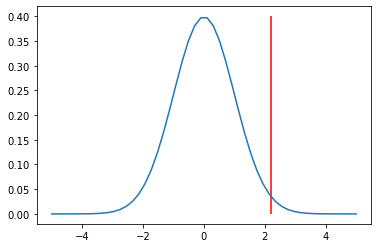

In [98]:
x = np.linspace(-5, 5, num = 50)
y = sps.norm.pdf(x)
plt.plot(x, y)
plt.vlines(z, ymin = 0, ymax = 0.4, color = 'red');

In [ ]:
sps.

Имеются данные о стоимости и размерах 53940 бриллиантов:
    Отделите 25% случайных наблюдений в тестовую выборку с помощью функции sklearn.cross_validation.train_test_split (зафиксируйте random state = 1). На обучающей выборке настройте две регрессионные модели:

линейную регрессию с помощью LinearRegression без параметров

случайный лес из 10 деревьев с помощью RandomForestRegressor с random_state=1.

Какая из моделей лучше предсказывает цену бриллиантов? Сделайте предсказания на тестовой выборке, посчитайте модули отклонений предсказаний от истинных цен. Проверьте гипотезу об одинаковом среднем качестве предсказаний, вычислите достигаемый уровень значимости. Отвергается ли гипотеза об одинаковом качестве моделей против двусторонней альтернативы на уровне значимости \alpha=0.05α=0.05?

In [102]:
diam = pd.read_csv('diamonds.txt', delimiter = '\t')

In [104]:
diam.head()

,carat,depth,table,price,x,y,z
0,0.23,61.5,55.0,326,3.95,3.98,2.43
1,0.21,59.8,61.0,326,3.89,3.84,2.31
2,0.23,56.9,65.0,327,4.05,4.07,2.31
3,0.29,62.4,58.0,334,4.20,4.23,2.63
4,0.31,63.3,58.0,335,4.34,4.35,2.75


In [107]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

In [108]:
X = diam.drop('price', axis = 1)
y = diam['price']

In [112]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 1, test_size = 0.25)

In [123]:
linreg = LinearRegression()
linreg.fit(X_train, y_train)
y_pred = linreg.predict(X_test)
y_test = np.array(y_test)
y_diff_lin = np.abs(y_test - y_pred)
lin_reg_diff_mean = y_diff_lin.mean()
lin_reg_diff_mean

890.3764004285591

In [142]:
forest = RandomForestRegressor(random_state = 1,  n_estimators=10)
forest.fit(X_train, y_train)
y_pred = forest.predict(X_test)
y_test = np.array(y_test)
y_diff = np.abs(y_test - y_pred)
forest_diff_mean = y_diff.mean()

In [143]:
forest_diff_mean

802.9205172724115

((array([-3.88388616, -3.66274206, -3.54151337, ...,  3.54151337,
          3.66274206,  3.88388616]),
  array([-6109.97686053, -5636.77396851, -5523.53373191, ...,
          8839.29300989, 10824.7757726 , 15105.14636008])),
 (716.7534700651935, 87.45588315614732, 0.9185188119907334))

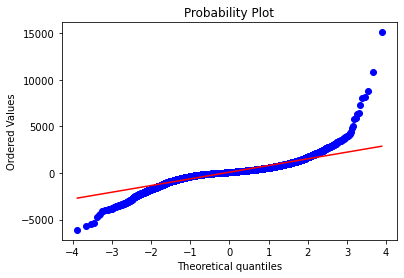

In [144]:
sps.probplot(y_diff_lin - y_diff, dist = "norm", plot = plt)

In [145]:
print("Shapiro-Wilk normality test, W-statistic: %f, p-value: %f" % sps.shapiro(y_diff_lin - y_diff))

Shapiro-Wilk normality test, W-statistic: 0.844494, p-value: 0.000000


C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\morestats.py:1681: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


Вообще говоря, в данном случае распределение разностей отличается от нормального (подтверждается qq графиком и тестом Шапиро Уилка( H0: распределение нормально, p_value крайне мал). Однако по задаче мы должны посчитать одинаковое качество средних предсказаний (связанные выборки)

In [146]:
_, pv = sps.ttest_rel(y_diff_lin, y_diff)

In [147]:
pv.round(4)

0.0

В предыдущей задаче посчитайте 95% доверительный интервал для разности средних абсолютных ошибок предсказаний регрессии и случайного леса. Чему равна его ближайшая к нулю граница? Округлите до десятков

In [148]:
diff = y_diff_lin - y_diff

In [149]:
diff_mean = diff.mean()
diff_std = diff.std(ddof=1)
diff_mean_std = diff_std / np.sqrt(len(diff))
conf_int = _tconfint_generic(diff_mean, diff_mean_std, len(diff) - 1, 0.05, 'two-sided')

In [150]:
conf_int

(74.28724532595325, 100.62452098634179)

# Параметрические критерии для проверки гипотез

# Что в целом можно сделать с долями:
from statsmodels.stats.proportion import proportion_confint

from statsmodels.stats.proportion import samplesize_confint_proportion

from statsmodels.stats.weightstats import *

from scipy import stats
1. Точечная оценка доли по выборке


2. Интервальная оценка доли по выборке: построить доверительный интервал на основе нормального распределения или методом Уилсона: 

**proportion_confint**(num_succeses, num_trials, method = 'normal')

**proportion_confint**(num_succeses, num_trials, method = 'wilson')


3. Посчитать необходимый размер выборки для интервала для доли заданной ширины: 
n_samples = int(np.ceil(**samplesize_confint_proportion**(proportion, desired half_length)))

4. Проверить гипотезу о том, что полученная в выборке доле совпадает или не совпадает с какой-то заданной: с использованием биномиального критерия для доли
F_H0 = **stats.binom**(num_trials, 0.5)  # Нулевое распределение Т статистики для доли (Биномиальное распределение, с некоторой вероятностью успеха).
**stats.binom_test**(num_succeses, num_trials, hypothesis probability of success, alternative = 'greater') 

5. Для разницы двух долей можно построить доверительные интервалы (для связанных или несвязанных выборок)
$$\text{Доверительный интервал для независимых выборок  }p_1 - p_2\colon \;\; \hat{p}_1 - \hat{p}_2 \pm z_{1-\frac{\alpha}{2}}\sqrt{\frac{\hat{p}_1(1 - \hat{p}_1)}{n_1} + \frac{\hat{p}_2(1 - \hat{p}_2)}{n_2}}$$
$$\text{Доверительный интервал для связанных выборок  }p_1 - p_2\colon \;\;  \frac{f - g}{n} \pm z_{1-\frac{\alpha}{2}}\sqrt{\frac{f + g}{n^2} - \frac{(f - g)^2}{n^3}}$$
f = количество случаев, когда х1 = 1 и х2 = 0. g = количество случаев, когда х1 = 0 и х2 = 1. e - количество случаев, когда х1 = 1 и х2 = 1
$$ \hat{p}_1 = \frac{e + f}{n}$$

$$ \hat{p}_2 = \frac{e + g}{n}$$

$$ \hat{p}_1 - \hat{p}_2 = \frac{f - g}{n}$$

6. Для двух долей можно проверить гипотезу о их совпадении / нессовпадении. z-критерий для разности долей (для связанных и несвязанных выборок)
$$\text{Z-статистика для независимых выборок:  } Z({X_1, X_2}) =  \frac{\hat{p}_1 - \hat{p}_2}{\sqrt{P(1 - P)(\frac{1}{n_1} + \frac{1}{n_2})}}$$
$$P = \frac{\hat{p}_1{n_1} + \hat{p}_2{n_2}}{{n_1} + {n_2}} $$

$$\text{Z-статистика для связанных выборок: } Z({X_1, X_2}) = \frac{f - g}{\sqrt{f + g - \frac{(f-g)^2}{n}}}$$


In [53]:
from statsmodels.stats.proportion import proportion_confint
from statsmodels.stats.proportion import samplesize_confint_proportion
from statsmodels.stats.weightstats import *
from scipy import stats
import scipy

def proportions_diff_confint_ind(sample1, sample2, alpha = 0.05):    
    z = scipy.stats.norm.ppf(1 - alpha / 2.)   
    p1 = float(sum(sample1)) / len(sample1)
    p2 = float(sum(sample2)) / len(sample2)
    left_boundary = (p1 - p2) - z * np.sqrt(p1 * (1 - p1)/ len(sample1) + p2 * (1 - p2)/ len(sample2))
    right_boundary = (p1 - p2) + z * np.sqrt(p1 * (1 - p1)/ len(sample1) + p2 * (1 - p2)/ len(sample2))
    return (left_boundary, right_boundary)

def proportions_diff_z_stat_ind(sample1, sample2):
    n1 = len(sample1)
    n2 = len(sample2)
    p1 = float(sum(sample1)) / n1
    p2 = float(sum(sample2)) / n2 
    P = float(p1*n1 + p2*n2) / (n1 + n2)
    return (p1 - p2) / np.sqrt(P * (1 - P) * (1. / n1 + 1. / n2))

def proportions_diff_confint_rel(sample1, sample2, alpha = 0.05):
    z = scipy.stats.norm.ppf(1 - alpha / 2.)
    sample = list(zip(sample1, sample2))
    n = len(sample)
    f = sum([1 if (x[0] == 1 and x[1] == 0) else 0 for x in sample])
    g = sum([1 if (x[0] == 0 and x[1] == 1) else 0 for x in sample])
    left_boundary = float(f - g) / n  - z * np.sqrt(float((f + g)) / n**2 - float((f - g)**2) / n**3)
    right_boundary = float(f - g) / n  + z * np.sqrt(float((f + g)) / n**2 - float((f - g)**2) / n**3)
    return (left_boundary, right_boundary)

def proportions_diff_z_stat_rel(sample1, sample2):
    sample = list(zip(sample1, sample2))
    n = len(sample)
    f = sum([1 if (x[0] == 1 and x[1] == 0) else 0 for x in sample])
    g = sum([1 if (x[0] == 0 and x[1] == 1) else 0 for x in sample])
    return float(f - g) / np.sqrt(f + g - float((f - g)**2) / n )

def proportions_diff_z_test(z_stat, alternative = 'two-sided'):
    if alternative not in ('two-sided', 'less', 'greater'):
        raise ValueError("alternative not recognized\n"
                         "should be 'two-sided', 'less' or 'greater'")
    if alternative == 'two-sided':
        return 2 * (1 - scipy.stats.norm.cdf(np.abs(z_stat)))
    if alternative == 'less':
        return scipy.stats.norm.cdf(z_stat)
    if alternative == 'greater':
        return 1 - scipy.stats.norm.cdf(z_stat)

Вопрос 3
В одном из выпусков программы "Разрушители легенд" проверялось, действительно ли заразительна зевота. В эксперименте участвовало 50 испытуемых, проходивших собеседование на программу. Каждый из них разговаривал с рекрутером; в конце 34 из 50 бесед рекрутер зевал. Затем испытуемых просили подождать решения рекрутера в соседней пустой комнате. 

Во время ожидания 10 из 34 испытуемых экспериментальной группы и 4 из 16 испытуемых контрольной начали зевать. Таким образом, разница в доле зевающих людей в этих двух группах составила примерно 4.4%. Ведущие заключили, что миф о заразительности зевоты подтверждён. 

Можно ли утверждать, что доли зевающих в контрольной и экспериментальной группах отличаются статистически значимо? Посчитайте достигаемый уровень значимости при альтернативе заразительности зевоты, округлите до четырёх знаков после десятичной точки.

H0: Зевота незаразительна, p1 = p2
H1: Зевота заразительна, p1 > p2

In [55]:
n1 = 34
s1 = 10
n2 = 16
s2 = 4
p1 = s1 / n1
p2 = s2 / n2
print(f"Точечная оценка разности доли зевнувших в экспериментальной и контрольной группе: {(p1 - p2)*100:.2}%")
print(f"Доверительный интервал для верости зевоты в экспериментальной группе: \
{proportion_confint(10, 34, method = 'wilson')}")
print(f"Доверительный интервал для вероятности зевоты в контрольной группе: \
{proportion_confint(4, 16, method = 'wilson')}")
z = stats.norm.ppf(1 - 0.05 / 2)
left = p1 - p2 - z * (p1 * (1 - p1) / n1 + p2 * (1 - p2) / n2) ** 0.5
right =  p1 - p2 + z * (p1 * (1 - p1) / n1 + p2 * (1 - p2) / n2) ** 0.5
print(f"Доверительный интервал для разности долей зевнувших в рвух группах:{left, right}")
print('Доверительный инервалы долей пересекаются, а доверительный интервал \
для разности долей включает ноль. Проведем статистический тест, используя z критерий')
p = (s1 + s2) / (n1 + n2)
z_stat = (p1 - p2) / np.sqrt(p * (1 - p) * (1 / n1 + 1 / n2))
print(f"Значение z статистики: {z_stat}")
p_value = 1 - stats.norm.cdf(z_stat)
print(f"Достигаемый уровень значимости для альтернативы p1 > p2: {p_value}")

Точечная оценка разности доли зевнувших в экспериментальной и контрольной группе: 4.4%
Доверительный интервал для верости зевоты в экспериментальной группе: (0.16834630670422424, 0.4616890979471444)
Доверительный интервал для вероятности зевоты в контрольной группе: (0.10182067491213043, 0.4949831653550878)
Доверительный интервал для разности долей зевнувших в рвух группах:(-0.2175577216559601, 0.3057930157736072)
Доверительный инервалы долей пересекаются, а доверительный интервал для разности долей включает ноль. Проведем статистический тест, используя z критерий
Значение z статистики: 0.32410186177608225
Достигаемый уровень значимости для альтернативы p1 > p2: 0.37293045872523534


Имеются данные измерений двухсот швейцарских тысячефранковых банкнот, бывших в обращении в первой половине XX века. Сто из банкнот были настоящими, и сто — поддельными. Отделите 50 случайных наблюдений в тестовую выборку с помощью функции sklearn.cross_validation.train_test_split (зафиксируйте random state = 1). На оставшихся 150 настройте два классификатора поддельности банкнот:

логистическая регрессия по признакам X_1,X_2,X_3X 

логистическая регрессия по признакам X_4,X_5,X_6X 

Каждым из классификаторов сделайте предсказания меток классов на тестовой выборке. Одинаковы ли доли ошибочных предсказаний двух классификаторов? Проверьте гипотезу, вычислите достигаемый уровень значимости. Введите номер первой значащей цифры

In [58]:
import pandas as pd
bank = pd.read_csv('banknotes.txt', delimiter = '\t')
bank.head()
X_first = bank.drop(['real', 'X4', 'X5', 'X6'], axis = 1)
X_second = bank.drop(['real', 'X1', 'X2', 'X3'], axis = 1)
y = bank['real']
from sklearn.model_selection import train_test_split
X_train_first, X_test_first, X_train_second, X_test_second, y_train, y_test = train_test_split(X_first, 
                                                                                               X_second, 
                                                                                               y, 
                                                                                               test_size = 50, 
                                                                                               random_state = 1)
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(solver='liblinear')
logreg.fit(X_train_first, y_train)
y_pred_first = logreg.predict(X_test_first)
logreg.fit(X_train_second, y_train)
y_pred_second = logreg.predict(X_test_second)
from sklearn import metrics
wrong_first = 1 - metrics.accuracy_score(y_test, y_pred_first)
wrong_second = 1 - metrics.accuracy_score(y_test, y_pred_second)
print(f"Доля ошибочных предсказаний первого и второго классификатора: {wrong_first, wrong_second}")

Доля ошибочных предсказаний первого и второго классификатора: (0.19999999999999996, 0.020000000000000018)


h0: p1 = p2

h1: p1 != p2

Используем z критерий для связанных выборок

In [63]:
import numpy as np
f = sum([1 for i in range(len(y_pred_second)) if y_pred_second[i] == y_test.values[i] and y_pred_first[i] != y_test.values[i]])
g = sum([1 for i in range(len(y_pred_second)) if y_pred_second[i] != y_test.values[i] and y_pred_first[i] == y_test.values[i]])
z_stat = (f - g) / np.sqrt(f + g - ((f - g) ** 2) / len(y_test))
print(f"Z статистика для рязности долей: {z_stat}")
p_value = 2 * (1 - stats.norm.cdf(np.abs(z_stat)))
print(f'Достигаемый уровень значимости: {p_value}')
print("Посчитаем доверительный интервал для разности двух долей")
z_alpha_2 = stats.norm.ppf(1 - 0.05 / 2)
n = len(y_test)
left = (f - g) / n - z_alpha_2 * (np.sqrt((f + g) / n ** 2 - (f - g) ** 2 / n ** 3))
right = (f - g) / n + z_alpha_2 * (np.sqrt((f + g) / n ** 2 - (f - g) ** 2 / n ** 3))
print(f"Доверительный интервал: {left, right}")
print(f"{left:.3}")

Z статистика для рязности долей: 2.9386041680175268
Достигаемый уровень значимости: 0.0032969384555543435
Посчитаем доверительный интервал для разности двух долей
Доверительный интервал: (0.059945206279614305, 0.3000547937203857)
0.0599


Ежегодно более 200000 людей по всему миру сдают стандартизированный экзамен GMAT при поступлении на программы MBA. Средний результат составляет 525 баллов, стандартное отклонение — 100 баллов. 

Сто студентов закончили специальные подготовительные курсы и сдали экзамен. Средний полученный ими балл — 541.4. Проверьте гипотезу о неэффективности программы против односторонней альтернативы о том, что программа работает. Отвергается ли на уровне значимости 0.05 нулевая гипотеза? Введите достигаемый уровень значимости, округлённый до 4 знаков после десятичной точки. 

mu = 525
std = 100

mu1 = 541.4

h0: mu1 = mu

h1: mu1 > mu

При известном стандартном отклонении генеральной совокупности используем z критерий

z-Stat: (mu1 - mu) / std

In [47]:
stat = (541.4 - 525) / (100 / np.sqrt(100))
p_value = 1 - stats.norm.cdf(stat)
print(f"Z критерий: {stat}")
print(f"Достигаемый уровень значимости: {p_value:.4}")

Z критерий: 1.6399999999999977
Достигаемый уровень значимости: 0.0505
